In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer
import math
from matplotlib import pyplot as plt
import random
from scipy.optimize import minimize
from qiskit.circuit.library import RZZGate
import networkx as nx
from qiskit.providers.aer import StatevectorSimulator
from qiskit.quantum_info import Statevector

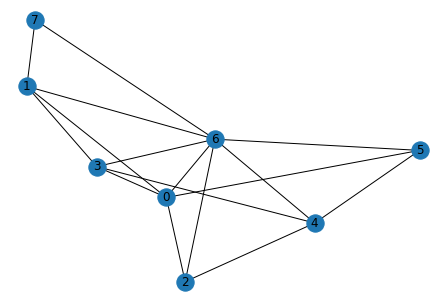

In [2]:
N = 8
graph=[(0, 1,1.0 ),(0, 2,2.0 ),(0, 3,5.0 ),(0, 5,1.0 ),(0, 6,3.0 ),(1, 3,2.0 ),(1, 6,1.0 ),(1, 7,4.0 ),
       (2, 4,1.0 ),(2, 6,1.0 ),(3, 4,2.0 ),(3, 6,3.0 ),(4, 5,1.0 ),(4, 6,1.0 ),(5, 6,2.0 ),(6, 7,1.0 )] 
G=nx.Graph()
G.add_weighted_edges_from(graph)
nx.draw(G,with_labels=True)

In [3]:
A=np.zeros((int(N),int(N)))
for i in graph:
    A[i[0]][i[1]] = i[2]
    A[i[1]][i[0]] = i[2]

In [4]:
def initialization(circuit):
    for qubit in circuit.qubits:
        circuit.h(qubit)
    return circuit

In [5]:
def cost_unitary_layer(circuit,gamma):
    for edge in graph:
        if edge[1] == edge[0] + 1:
            circuit.append(RZZGate(gamma*edge[2]),[edge[0],edge[0]+1])
        if edge[1] != edge[0] + 1:
            circuit.swap(edge[1],edge[0]+1)
            circuit.append(RZZGate(gamma*edge[2]),[edge[0],edge[0]+1])
            circuit.swap(edge[1],edge[0]+1)
    circuit.barrier()
    return circuit

In [6]:
def mixture_unitary_layer(circuit,alpha):
    for qubit in circuit.qubits:
        circuit.rx(alpha,qubit)
    circuit.barrier()
    return circuit

In [7]:
def create_params(params):
    alphas = []
    gammas = []
    for i in range(int(len(params)/2)):
        gammas.append(params[2*i])
        alphas.append(params[2*i+1])
    return gammas , alphas

In [8]:
def anasatz(params):
    gammas, alphas = create_params(params)
    q = QuantumRegister(N)
    c = ClassicalRegister(N)
    circuit = QuantumCircuit(q,c)
    circuit = initialization(circuit)
    for i in range(n_layers):
        circuit = cost_unitary_layer(circuit, gammas[i])
        circuit = mixture_unitary_layer(circuit,alphas[i])
    #circuit.measure(circuit.qubits,c)
    
    
    simulator = StatevectorSimulator()
    result = execute(circuit,simulator).result()
    sv = result.get_statevector(circuit)
    states = Statevector(sv)
    counts = states.probabilities_dict(decimals=3)
    for key in counts.keys():
        counts[key] = int(1000*counts[key])
        
        
    results = counts.keys()
    new_res=[]
    for key in results:
        hold=[]
        for i in range(0,len(key)):
            hold.append(int(key[i]))
        for i in range(0,counts[key]):
            new_res.append(hold)
    return circuit,counts,new_res

In [9]:
n_layers = 1
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]

In [10]:
circuit,counts,new_res = anasatz(params)

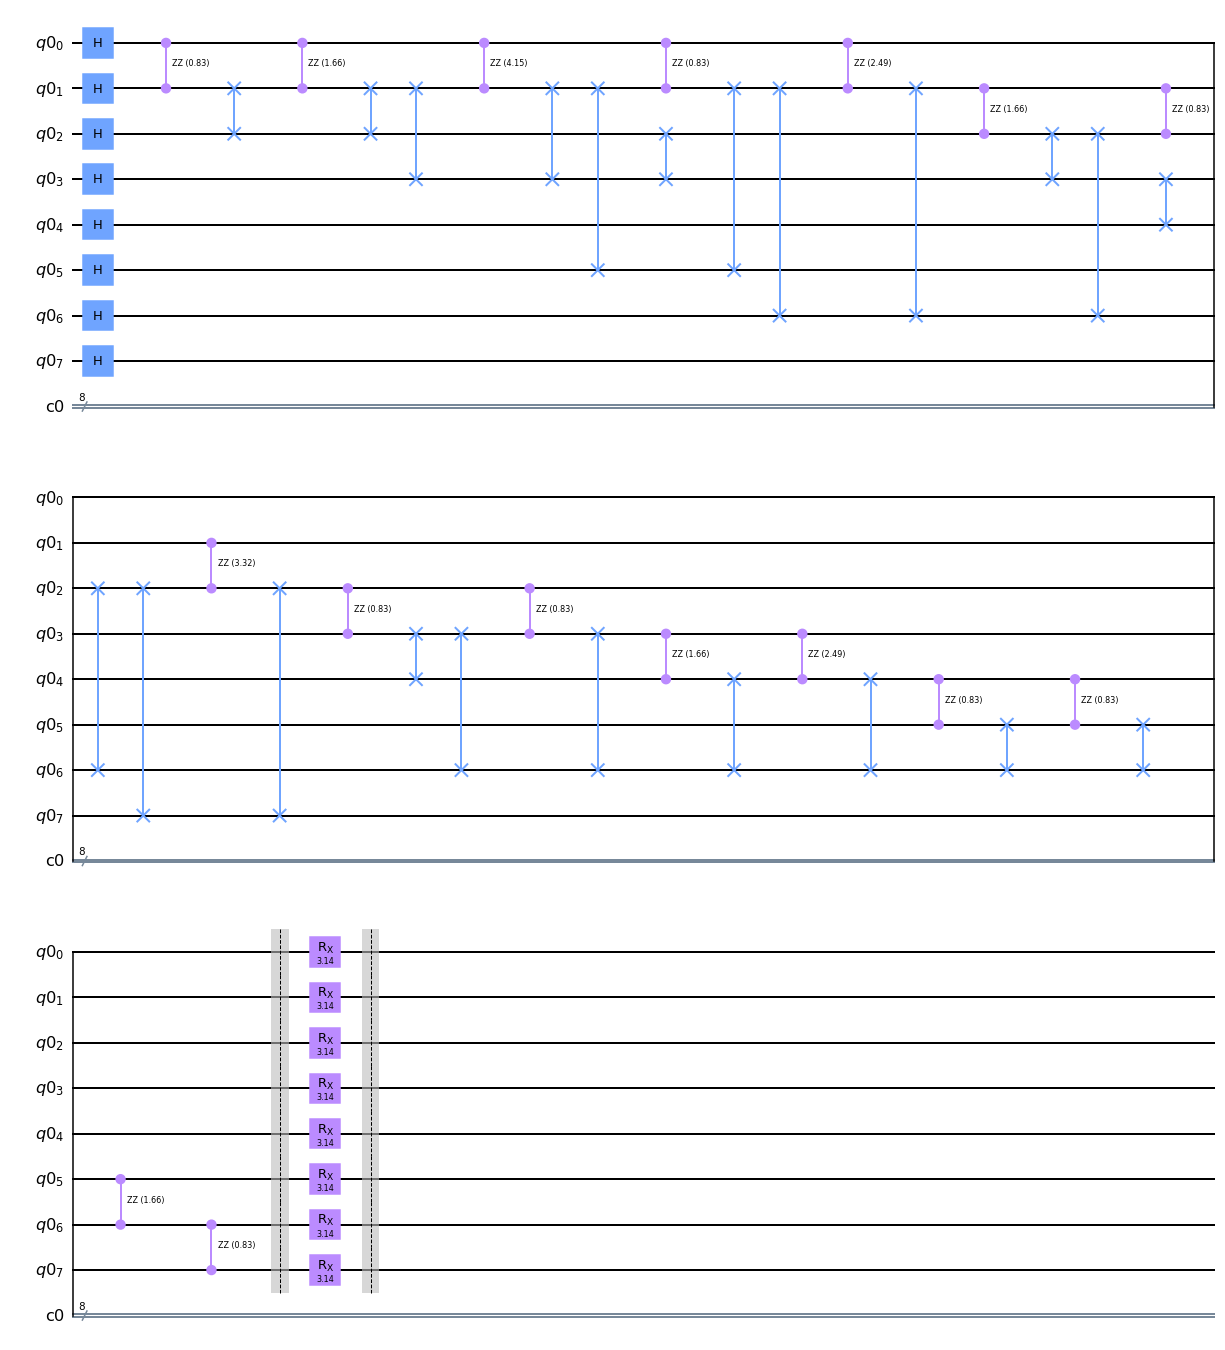

In [11]:
circuit.draw('mpl')

In [12]:
def cost_function(params):
    circuit,counts,result = anasatz(params)
    total_cost = 0
    for i in range(len(result)):
        for edge in graph:
            total_cost += (A[edge[0]][edge[1]])*(1-2*result[i][edge[0]])*(1-2*result[i][edge[1]]) + (A[edge[1]][edge[0]])*(1-2*result[i][edge[1]])*(1-2*result[i][edge[0]])
    total_cost = total_cost/1024
    print("Cost: "+str(total_cost))
    return total_cost 

optimization for depth :1
Cost: -1.75390625
Cost: 3.41015625
Cost: -0.02734375
Cost: 6.74609375
Cost: -3.6953125
Cost: 8.921875
Cost: -3.328125
Cost: 2.65234375
Cost: -0.19140625
Cost: -2.30078125
Cost: -3.5546875
Cost: -3.56640625
Cost: -3.39453125
Cost: -3.625
Cost: -3.83203125
Cost: -3.69921875
Cost: -3.86328125
Cost: -3.7890625
Cost: -3.86328125
Cost: -3.86328125
Cost: -3.86328125
Cost: -3.86328125
Cost: -3.86328125
Cost: -3.86328125
Out:      fun: -3.86328125
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 24
  status: 1
 success: True
       x: array([ 0.64859596, -1.345056  ])


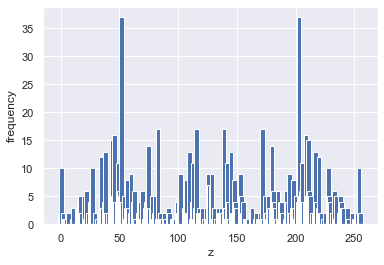

Z with maximum frequency is  :203


In [13]:
import seaborn as sns
collect_counts = []
collect_costs = []
n_layers = 1
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]
num_iters = 100
print("optimization for depth :{}".format(n_layers))
out = minimize(cost_function, x0=params, method="COBYLA", options={'maxiter':num_iters})
print(f'Out: {out}')
circuit,counts,result = anasatz(out['x'])
collect_counts.append(counts)
collect_costs.append(out.fun)

x=[]
y=[]
for key in counts.keys():
    num = 0
    
    for i in range(len(key)):
        num = num + pow(2,i)*int(key[len(key)-1-i])
    x.append(num)
    y.append(counts[key])
    if counts[key] == max(y):
        maximum = num
sns.set()
plt.bar(x,y,color='b', width = 4)
plt.xlabel("z")
plt.ylabel("frequency")
plt.show()
print("Z with maximum frequency is  :{}".format(maximum))

optimization for depth :2
Cost: -0.39453125
Cost: 1.19140625
Cost: 3.94921875
Cost: 1.1484375
Cost: 3.734375
Cost: 4.7578125
Cost: 1.3984375
Cost: 1.33203125
Cost: -0.82421875
Cost: 0.4140625
Cost: 0.9765625
Cost: -1.41796875
Cost: -0.66796875
Cost: -0.85546875
Cost: -1.49609375
Cost: -2.3828125
Cost: -3.0625
Cost: -3.00390625
Cost: -3.109375
Cost: -3.27734375
Cost: -3.34765625
Cost: -3.3515625
Cost: -3.328125
Cost: -2.87890625
Cost: -3.5078125
Cost: -3.58203125
Cost: -3.44140625
Cost: -3.1796875
Cost: -3.4296875
Cost: -3.49609375
Cost: -3.546875
Cost: -3.40234375
Cost: -3.62890625
Cost: -3.41796875
Cost: -3.609375
Cost: -3.53125
Cost: -3.62890625
Cost: -3.40625
Cost: -3.42578125
Cost: -3.6328125
Cost: -3.64453125
Cost: -3.6171875
Cost: -3.64453125
Cost: -3.62109375
Cost: -3.64453125
Cost: -3.62890625
Cost: -3.6328125
Cost: -3.6171875
Cost: -3.64453125
Cost: -3.64453125
Cost: -3.64453125
Cost: -3.64453125
Cost: -3.64453125
Out:      fun: -3.64453125
   maxcv: 0.0
 message: 'Optimizatio

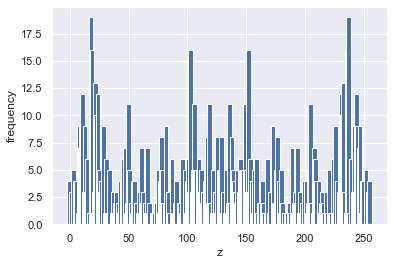

Z with maximum frequency is  :237


In [14]:
n_layers = 2
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]
num_iters = 100
print("optimization for depth :{}".format(n_layers))
out = minimize(cost_function, x0=params, method="COBYLA", options={'maxiter':num_iters})
print(f'Out: {out}')
circuit,counts,result = anasatz(out['x'])
collect_counts.append(counts)
collect_costs.append(out.fun)

x=[]
y=[]
for key in counts.keys():
    num = 0
    
    for i in range(len(key)):
        num = num + pow(2,i)*int(key[len(key)-1-i])
    x.append(num)
    y.append(counts[key])
    if counts[key] == max(y):
        maximum = num
sns.set()
plt.bar(x,y,color='b', width = 4)
plt.xlabel("z")
plt.ylabel("frequency")
plt.show()
print("Z with maximum frequency is  :{}".format(maximum))

optimization for depth :3
Cost: 1.8359375
Cost: 1.25
Cost: 4.9375
Cost: 1.71484375
Cost: 0.3515625
Cost: 1.1640625
Cost: -1.86328125
Cost: -1.82421875
Cost: 0.765625
Cost: -5.21875
Cost: -2.10546875
Cost: -4.90234375
Cost: -2.41015625
Cost: -3.8984375
Cost: -4.5546875
Cost: -3.890625
Cost: -4.95703125
Cost: -6.6484375
Cost: -5.27734375
Cost: -6.37109375
Cost: -6.01953125
Cost: -6.31640625
Cost: -5.73828125
Cost: -7.078125
Cost: -6.70703125
Cost: -7.2734375
Cost: -7.2265625
Cost: -7.3203125
Cost: -7.76171875
Cost: -8.1171875
Cost: -8.296875
Cost: -7.79296875
Cost: -8.27734375
Cost: -8.07421875
Cost: -7.8125
Cost: -8.1015625
Cost: -8.30078125
Cost: -8.44140625
Cost: -8.40234375
Cost: -8.2421875
Cost: -8.11328125
Cost: -8.2109375
Cost: -8.27734375
Cost: -8.34765625
Cost: -8.3359375
Cost: -8.33984375
Cost: -8.44140625
Cost: -8.453125
Cost: -8.4453125
Cost: -8.39453125
Cost: -8.4375
Cost: -8.3984375
Cost: -8.453125
Cost: -8.46484375
Cost: -8.4375
Cost: -8.46484375
Cost: -8.48828125
Cost: -8

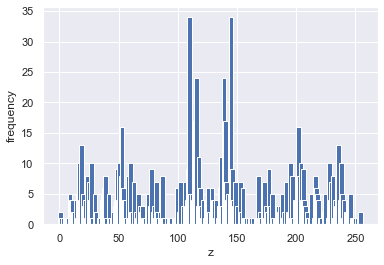

Z with maximum frequency is  :145


In [15]:
n_layers = 3
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]
num_iters = 100
print("optimization for depth :{}".format(n_layers))
out = minimize(cost_function, x0=params, method="COBYLA", options={'maxiter':num_iters})
print(f'Out: {out}')
circuit,counts,result = anasatz(out['x'])
collect_counts.append(counts)
collect_costs.append(out.fun)

x=[]
y=[]
for key in counts.keys():
    num = 0
    
    for i in range(len(key)):
        num = num + pow(2,i)*int(key[len(key)-1-i])
    x.append(num)
    y.append(counts[key])
    if counts[key] == max(y):
        maximum = num
sns.set()
plt.bar(x,y,color='b', width = 4)
plt.xlabel("z")
plt.ylabel("frequency")
plt.show()
print("Z with maximum frequency is  :{}".format(maximum))

optimization for depth :4
Cost: 2.6484375
Cost: -0.76953125
Cost: 0.17578125
Cost: 0.875
Cost: 1.66015625
Cost: 1.76171875
Cost: -0.953125
Cost: 0.015625
Cost: 5.00390625
Cost: 0.9921875
Cost: -1.78515625
Cost: -0.25
Cost: 0.62890625
Cost: -0.6953125
Cost: -1.43359375
Cost: -1.25390625
Cost: 0.08984375
Cost: -1.640625
Cost: -0.5078125
Cost: -0.54296875
Cost: -0.86328125
Cost: -1.10546875
Cost: -2.37890625
Cost: -2.7109375
Cost: -2.796875
Cost: -1.953125
Cost: -3.30078125
Cost: -3.26953125
Cost: -3.0390625
Cost: -2.81640625
Cost: -2.86328125
Cost: -3.1171875
Cost: -3.06640625
Cost: -2.55078125
Cost: -2.89453125
Cost: -3.46484375
Cost: -3.1484375
Cost: -3.5703125
Cost: -3.4765625
Cost: -3.46484375
Cost: -3.4453125
Cost: -3.6953125
Cost: -3.53515625
Cost: -3.41796875
Cost: -3.1328125
Cost: -3.51953125
Cost: -3.609375
Cost: -3.62109375
Cost: -3.4921875
Cost: -3.56640625
Cost: -3.63671875
Cost: -3.46484375
Cost: -3.390625
Cost: -3.671875
Cost: -3.62109375
Cost: -3.66015625
Cost: -3.65234375

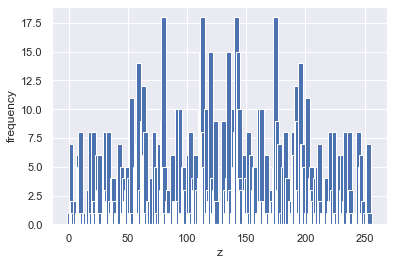

Z with maximum frequency is  :175


In [16]:
n_layers = 4
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]
num_iters = 100
print("optimization for depth :{}".format(n_layers))
out = minimize(cost_function, x0=params, method="COBYLA", options={'maxiter':num_iters})
print(f'Out: {out}')
circuit,counts,result = anasatz(out['x'])
collect_counts.append(counts)
collect_costs.append(out.fun)

x=[]
y=[]
for key in counts.keys():
    num = 0
    
    for i in range(len(key)):
        num = num + pow(2,i)*int(key[len(key)-1-i])
    x.append(num)
    y.append(counts[key])
    if counts[key] == max(y):
        maximum = num
sns.set()
plt.bar(x,y,color='b', width = 4)
plt.xlabel("z")
plt.ylabel("frequency")
plt.show()
print("Z with maximum frequency is  :{}".format(maximum))

optimization for depth :5
Cost: 1.7734375
Cost: 3.16015625
Cost: 3.29296875
Cost: 1.734375
Cost: 2.2734375
Cost: 0.33984375
Cost: -0.74609375
Cost: 3.125
Cost: -2.30078125
Cost: -1.2109375
Cost: 8.03125
Cost: -0.8984375
Cost: -3.72265625
Cost: 2.7265625
Cost: -0.6015625
Cost: -0.46875
Cost: -0.171875
Cost: -2.5234375
Cost: 0.796875
Cost: -2.984375
Cost: -1.3671875
Cost: -3.140625
Cost: -4.64453125
Cost: -4.4375
Cost: 12.26953125
Cost: -1.60546875
Cost: 0.2578125
Cost: -2.91015625
Cost: -4.90234375
Cost: -3.7109375
Cost: -2.18359375
Cost: -4.45703125
Cost: -4.65625
Cost: -4.56640625
Cost: -4.96875
Cost: -3.89453125
Cost: -5.19140625
Cost: -4.62890625
Cost: -4.15625
Cost: -5.05859375
Cost: -5.1171875
Cost: -5.15234375
Cost: -4.5546875
Cost: -4.9296875
Cost: -5.67578125
Cost: -1.4609375
Cost: -5.46484375
Cost: -5.2734375
Cost: -5.46484375
Cost: -3.09375
Cost: -5.4453125
Cost: -5.640625
Cost: -5.5859375
Cost: -5.39453125
Cost: -5.5
Cost: -5.6640625
Cost: -5.72265625
Cost: -5.46484375
Cost:

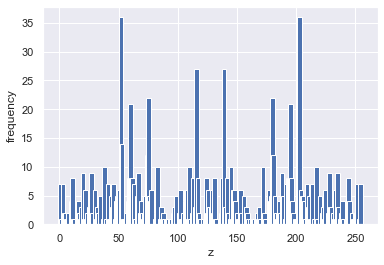

Z with maximum frequency is  :203


In [17]:
n_layers = 5
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]
num_iters = 100
print("optimization for depth :{}".format(n_layers))
out = minimize(cost_function, x0=params, method="COBYLA", options={'maxiter':num_iters})
print(f'Out: {out}')
circuit,counts,result = anasatz(out['x'])
collect_counts.append(counts)
collect_costs.append(out.fun)

x=[]
y=[]
for key in counts.keys():
    num = 0
    
    for i in range(len(key)):
        num = num + pow(2,i)*int(key[len(key)-1-i])
    x.append(num)
    y.append(counts[key])
    if counts[key] == max(y):
        maximum = num
sns.set()
plt.bar(x,y,color='b', width = 4)
plt.xlabel("z")
plt.ylabel("frequency")
plt.show()
print("Z with maximum frequency is  :{}".format(maximum))

optimization for depth :6
Cost: 0.1015625
Cost: 1.46484375
Cost: 0.28515625
Cost: -0.80078125
Cost: 0.96875
Cost: -0.43359375
Cost: 0.55859375
Cost: -0.1796875
Cost: -1.359375
Cost: -0.53515625
Cost: 0.796875
Cost: -0.55859375
Cost: -0.734375
Cost: 0.734375
Cost: -0.11328125
Cost: -2.109375
Cost: -1.3046875
Cost: 0.421875
Cost: 0.37890625
Cost: -1.94921875
Cost: -0.69921875
Cost: -1.99609375
Cost: -2.05859375
Cost: -1.203125
Cost: -1.390625
Cost: -0.58984375
Cost: -2.37109375
Cost: -3.13671875
Cost: -2.828125
Cost: -0.3515625
Cost: -0.83203125
Cost: -0.34765625
Cost: -2.46875
Cost: -3.28125
Cost: -3.02734375
Cost: -2.4296875
Cost: -2.8046875
Cost: -3.35546875
Cost: -1.671875
Cost: -2.703125
Cost: -3.83984375
Cost: -4.01171875
Cost: -3.2578125
Cost: -4.23046875
Cost: -4.30859375
Cost: -4.26171875
Cost: -3.21875
Cost: -3.9453125
Cost: -3.97265625
Cost: -4.0078125
Cost: -4.8046875
Cost: -4.6328125
Cost: -3.98828125
Cost: -4.421875
Cost: -4.171875
Cost: -4.84765625
Cost: -4.39453125
Cost: 

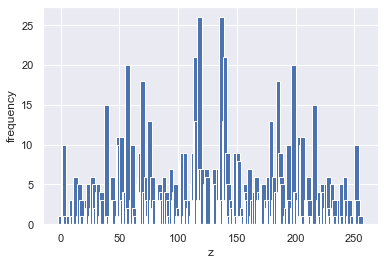

Z with maximum frequency is  :137


In [18]:
n_layers = 6
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]
num_iters = 100
print("optimization for depth :{}".format(n_layers))
out = minimize(cost_function, x0=params, method="COBYLA", options={'maxiter':num_iters})
print(f'Out: {out}')
circuit,counts,result = anasatz(out['x'])
collect_counts.append(counts)
collect_costs.append(out.fun)

x=[]
y=[]
for key in counts.keys():
    num = 0
    
    for i in range(len(key)):
        num = num + pow(2,i)*int(key[len(key)-1-i])
    x.append(num)
    y.append(counts[key])
    if counts[key] == max(y):
        maximum = num
sns.set()
plt.bar(x,y,color='b', width = 4)
plt.xlabel("z")
plt.ylabel("frequency")
plt.show()
print("Z with maximum frequency is  :{}".format(maximum))

optimization for depth :7
Cost: -1.875
Cost: 1.3515625
Cost: 0.6953125
Cost: 1.56640625
Cost: -2.703125
Cost: 3.49609375
Cost: 2.0234375
Cost: -1.0390625
Cost: -1.19921875
Cost: -1.91796875
Cost: -0.09375
Cost: -2.171875
Cost: 0.14453125
Cost: 1.32421875
Cost: -0.5703125
Cost: -0.16015625
Cost: -1.61328125
Cost: 2.25
Cost: 2.1328125
Cost: -0.91796875
Cost: -2.51171875
Cost: -2.29296875
Cost: -2.3046875
Cost: -2.20703125
Cost: -1.17578125
Cost: -2.09375
Cost: -1.5703125
Cost: -2.23046875
Cost: -1.921875
Cost: -0.66015625
Cost: -1.75390625
Cost: -0.26953125
Cost: -0.09765625
Cost: -2.41796875
Cost: -1.85546875
Cost: -2.5078125
Cost: -2.82421875
Cost: -3.015625
Cost: -2.8984375
Cost: -2.97265625
Cost: -2.8359375
Cost: -2.3515625
Cost: -2.37890625
Cost: -3.3046875
Cost: -3.109375
Cost: -3.23046875
Cost: -2.72265625
Cost: -3.1171875
Cost: -3.03125
Cost: -3.10546875
Cost: -2.8203125
Cost: -2.72265625
Cost: -3.1796875
Cost: -3.078125
Cost: -3.33984375
Cost: -3.2578125
Cost: -3.23046875
Cost: 

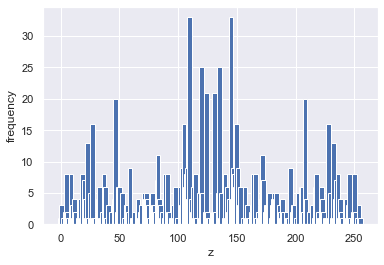

Z with maximum frequency is  :145


In [19]:
n_layers = 7
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]
num_iters = 100
print("optimization for depth :{}".format(n_layers))
out = minimize(cost_function, x0=params, method="COBYLA", options={'maxiter':num_iters})
print(f'Out: {out}')
circuit,counts,result = anasatz(out['x'])
collect_counts.append(counts)
collect_costs.append(out.fun)

x=[]
y=[]
for key in counts.keys():
    num = 0
    
    for i in range(len(key)):
        num = num + pow(2,i)*int(key[len(key)-1-i])
    x.append(num)
    y.append(counts[key])
    if counts[key] == max(y):
        maximum = num
sns.set()
plt.bar(x,y,color='b', width = 4)
plt.xlabel("z")
plt.ylabel("frequency")
plt.show()
print("Z with maximum frequency is  :{}".format(maximum))

In [20]:
len(collect_counts)

7

optimization for depth :8
Cost: 1.12109375
Cost: 0.72265625
Cost: -2.5859375
Cost: -0.23046875
Cost: -2.71484375
Cost: -1.859375
Cost: -2.37109375
Cost: -0.609375
Cost: -3.05859375
Cost: 1.76953125
Cost: -4.01953125
Cost: -2.47265625
Cost: -0.33203125
Cost: -1.06640625
Cost: -0.4140625
Cost: -1.31640625
Cost: -3.46484375
Cost: -0.8203125
Cost: 1.9921875
Cost: 3.3046875
Cost: -1.65625
Cost: -1.796875
Cost: -0.74609375
Cost: -4.02734375
Cost: 2.92578125
Cost: -4.28125
Cost: -0.73828125
Cost: -1.90625
Cost: 0.87890625
Cost: -3.48046875
Cost: -3.3046875
Cost: -4.1796875
Cost: -0.12109375
Cost: -3.3828125
Cost: -1.73828125
Cost: -4.17578125
Cost: -2.3359375
Cost: -1.90625
Cost: -0.88671875
Cost: 1.51171875
Cost: -0.828125
Cost: -4.96484375
Cost: -5.01953125
Cost: -1.3515625
Cost: -4.66015625
Cost: -5.2890625
Cost: -5.5546875
Cost: -5.2421875
Cost: -4.77734375
Cost: -4.625
Cost: -5.5546875
Cost: -4.32421875
Cost: -5.33203125
Cost: -4.49609375
Cost: -5.45703125
Cost: -5.453125
Cost: -5.511718

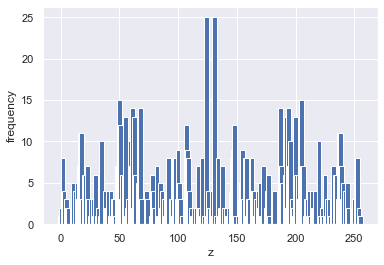

Z with maximum frequency is  :131


In [21]:
n_layers = 8
params = [float(random.randint(-314, 314))/float(100) for i in range(0, 2*n_layers)]
num_iters = 100
print("optimization for depth :{}".format(n_layers))
out = minimize(cost_function, x0=params, method="COBYLA", options={'maxiter':num_iters})
print(f'Out: {out}')
circuit,counts,result = anasatz(out['x'])
collect_counts.append(counts)
collect_costs.append(out.fun)

x=[]
y=[]
for key in counts.keys():
    num = 0
    
    for i in range(len(key)):
        num = num + pow(2,i)*int(key[len(key)-1-i])
    x.append(num)
    y.append(counts[key])
    if counts[key] == max(y):
        maximum = num
sns.set()
plt.bar(x,y,color='b', width = 4)
plt.xlabel("z")
plt.ylabel("frequency")
plt.show()
print("Z with maximum frequency is  :{}".format(maximum))

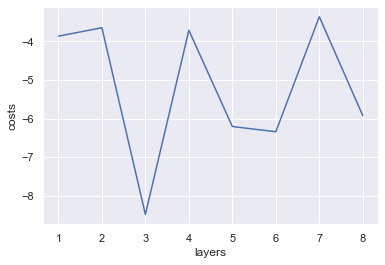

In [22]:
x = [1,2,3,4,5,6,7,8]
y = collect_costs
plt.plot(x,y)
plt.xlabel("layers")
plt.ylabel("costs")
plt.show()

In [23]:
best_cost_brute = 0
for b in range(2**N):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(N)))]
    cost = 0
    for i in range(N):
        for j in range(N):
            cost = cost + A[i,j]*x[i]*(1-x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    #print('case = ' + str(x)+ ' cost = ' + str(cost))

colors = ['r' if xbest_brute[i] == 0 else 'c' for i in range(N)]

print('\nBest solution = ' + str(xbest_brute) + ' cost = ' + str(best_cost_brute))


Best solution = [1, 1, 0, 0, 1, 0, 1, 0] cost = 25.0
